# Travelling salesman
simulated annealing을 이용해서 다음의 10개의 도시를 한번씩 방문하는 최단 거리를 구하세요.

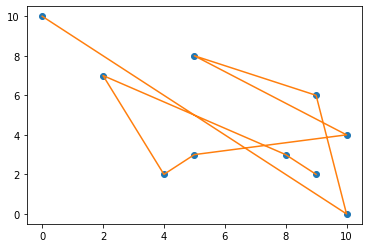

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import random

#x=[random.randint(0,10) for i in range(10)]
#y=[random.randint(0,10) for i in range(10)]
x=[0, 10, 9, 5, 10, 5, 4, 2, 8, 9]
y=[10, 0, 6, 8, 4, 3, 2, 7, 3, 2]
plt.plot(x,y,'o')
plt.plot(x,y)

예를 들어 위의 도시를 다음의 순서로 방문했다고 생각해 봅시다. 이 때 총 이동거리는 구해봅시다.

In [112]:
def dist(x,y):#거리구하기
    z=0
    for i in range(9):
        z+=np.sqrt((x[i+1]-x[i])**2+(y[i+1]-y[i])**2)
    return z
dist(x,y)

51.623872342863045

In [113]:
def de(i,j,x,y):#거리차이비교
    nx, ny = x[:], y[:]
    nx[i], nx[j] = nx[j], nx[i]
    ny[i], ny[j] = ny[j], ny[i]
    return dist(nx,ny)-dist(x,y)

In [114]:

import random

def swap(x,y,b):#순서섞기
    i=random.randint(0,9)
    j=random.randint(0,9)
    delta=de(i,j,x,y)
    if(delta<0):
        x[i], x[j] = x[j], x[i]
        y[i], y[j] = y[j], y[i]
    else:
        if(random.random()<np.exp(-b*delta)):
            x[i], x[j] = x[j], x[i]
            y[i], y[j] = y[j], y[i]
    return x,y

In [115]:
b=2 #b값이 너무 작아지면 사방으로 값이 튄다.

27.362382385504414

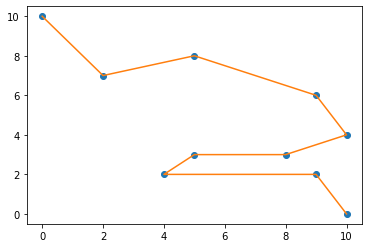

In [162]:
#식을 아무리 많이 작동시켜도 값이 고정되지 않는다. 그래서 나온 값들중 최소 값을 기록 할 필요가 있다.
for i in range(10000):
    swap(x,y,b)
plt.plot(x,y,'o')
plt.plot(x,y)
dist(x,y)


In [157]:
dist0=dist(x,y)#지금까지 나왔던 값들중 최단거리
x0, y0 = x[:], y[:]#지금까지 나왔던 값들중 최단거리 좌표 기록

In [163]:
#나왔던 값들중 최단거리를 찾는다 여러번 돌릴수있다.
#시간 오래걸린다.계산 끝나면 b값이 출력된다.

for i in range(100):
    for i in range(10000):
        dist_j=dist(x,y)
    
    if(dist0>dist_j):
        dist0=dist_j
        x0, y0 = x[:], y[:]
b

2

25.54052797037772

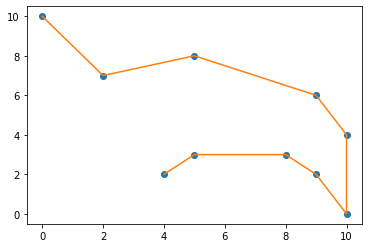

In [164]:
#지금까지 나왔던 값들중 최단거리
plt.plot(x0,y0,'o')
plt.plot(x0,y0)
dist(x0,y0)